In [ ]:
'''
Data Mining Project
Course ID: CSE529.1
Students names and IDs:
- MHD RAJA ABOU HARB (21COMP9001)
- Mohanad Altarah (219se2035)
Supervised By: Doctor Rahim Dehkharghani
'''

'\nData Mining Project\nCourse ID: CSE529.1\nStudents names and IDs:\n- MHD RAJA ABOU HARB (21COMP9001)\n- Mohanad Altarah (219se2035)\nSupervised By: Doctor Rahim Dehkharghani\n'

In [1]:
#Imported libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
#loading the dataset and showing the head of it
df=pd.read_csv('./Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
#showing the shape
df.shape

(38765, 3)

In [4]:
#dropping the NA 
df=df.dropna()
df.shape

(38765, 3)

In [5]:
#preparing the TDB DF
TDB_df=df.groupby(['Member_number','Date'])['itemDescription'].agg(set)
# reset index to get a DataFrame with three columns
TDB_df = TDB_df.reset_index()
print(TDB_df)

       Member_number        Date  \
0               1000  15-03-2015   
1               1000  24-06-2014   
2               1000  24-07-2015   
3               1000  25-11-2015   
4               1000  27-05-2015   
...              ...         ...   
14958           4999  24-01-2015   
14959           4999  26-12-2015   
14960           5000  09-03-2014   
14961           5000  10-02-2015   
14962           5000  16-11-2014   

                                         itemDescription  
0      {yogurt, whole milk, semi-finished bread, saus...  
1                      {pastry, whole milk, salty snack}  
2                         {canned beer, misc. beverages}  
3                            {sausage, hygiene articles}  
4                             {pickled vegetables, soda}  
...                                                  ...  
14958  {berries, kitchen towels, yogurt, tropical fru...  
14959                             {herbs, bottled water}  
14960                    {fruit/vege

In [6]:
#dropping the extra columns from the new df
TDB_df=TDB_df.drop(['Member_number','Date'], axis=1)

In [7]:
#show the head of the new df
TDB_df

,itemDescription
0,"{yogurt, whole milk, semi-finished bread, saus..."
1,"{pastry, whole milk, salty snack}"
2,"{canned beer, misc. beverages}"
3,"{sausage, hygiene articles}"
4,"{pickled vegetables, soda}"
...,...
14958,"{berries, kitchen towels, yogurt, tropical fru..."
14959,"{herbs, bottled water}"
14960,"{fruit/vegetable juice, onions}"
14961,"{root vegetables, semi-finished bread, soda}"


In [8]:
#show the shape of the new df
TDB_df.shape

(14963, 1)

In [9]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [10]:
#calculating the frequency of the items 
freq_df= df.groupby(['itemDescription']).count()
freq_df=freq_df.drop(['Date'], axis=1)
freq_df=freq_df.rename(columns={'Member_number': 'freq'})
freq_df=freq_df.reset_index()
freq_df.head()

,itemDescription,freq
0,Instant food products,60
1,UHT-milk,323
2,abrasive cleaner,22
3,artif. sweetener,29
4,baby cosmetics,3


In [11]:
#showing the shape of the frequency data frame
freq_df.shape

(167, 2)

In [12]:
#calculating some meta data from the dataset and they will be used later
TOTAL_ITEMS=freq_df.shape[0]
TOTAL_PURCHASED_ELEMENTS=freq_df['freq'].sum()
TOTAL_TRANSACTIONS=TDB_df.shape[0]

In [13]:
print("these are some of the meta data of elements")
print("the total elements in the store are: ",TOTAL_ITEMS)
print("the total purchased elements are: ",TOTAL_PURCHASED_ELEMENTS)
print("the total transactions are: ",TOTAL_TRANSACTIONS)

these are some of the meta data of elements
the total elements in the store are:  167
the total purchased elements are:  38765
the total transactions are:  14963


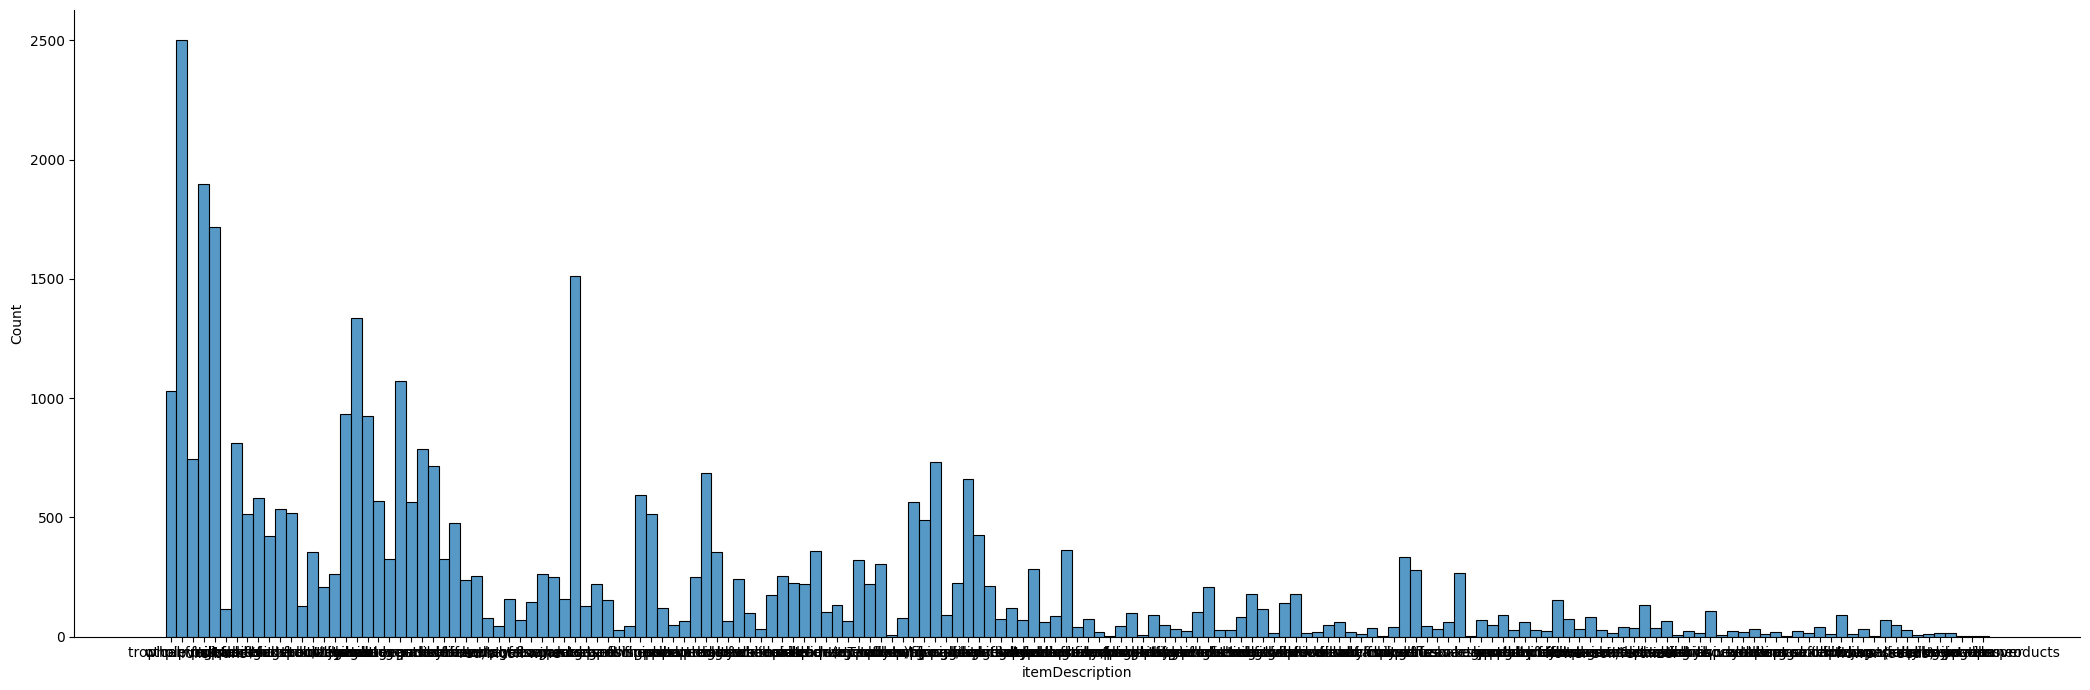

In [14]:
#visualizing the frequency df as bar chart

sns.displot(df['itemDescription'],kde=False,height=7, aspect=3)
sns.despine()
plt.box(True)

In [15]:
#counting the frequency of the customers come to the market
cust_freq_df=df.groupby(['Member_number']).count()
cust_freq_df=cust_freq_df.drop(['Date'], axis=1)
cust_freq_df=cust_freq_df.rename(columns={'itemDescription': 'freq'})
cust_freq_df=cust_freq_df.reset_index()
cust_freq_df.head()

,Member_number,freq
0,1000,13
1,1001,12
2,1002,8
3,1003,8
4,1004,21


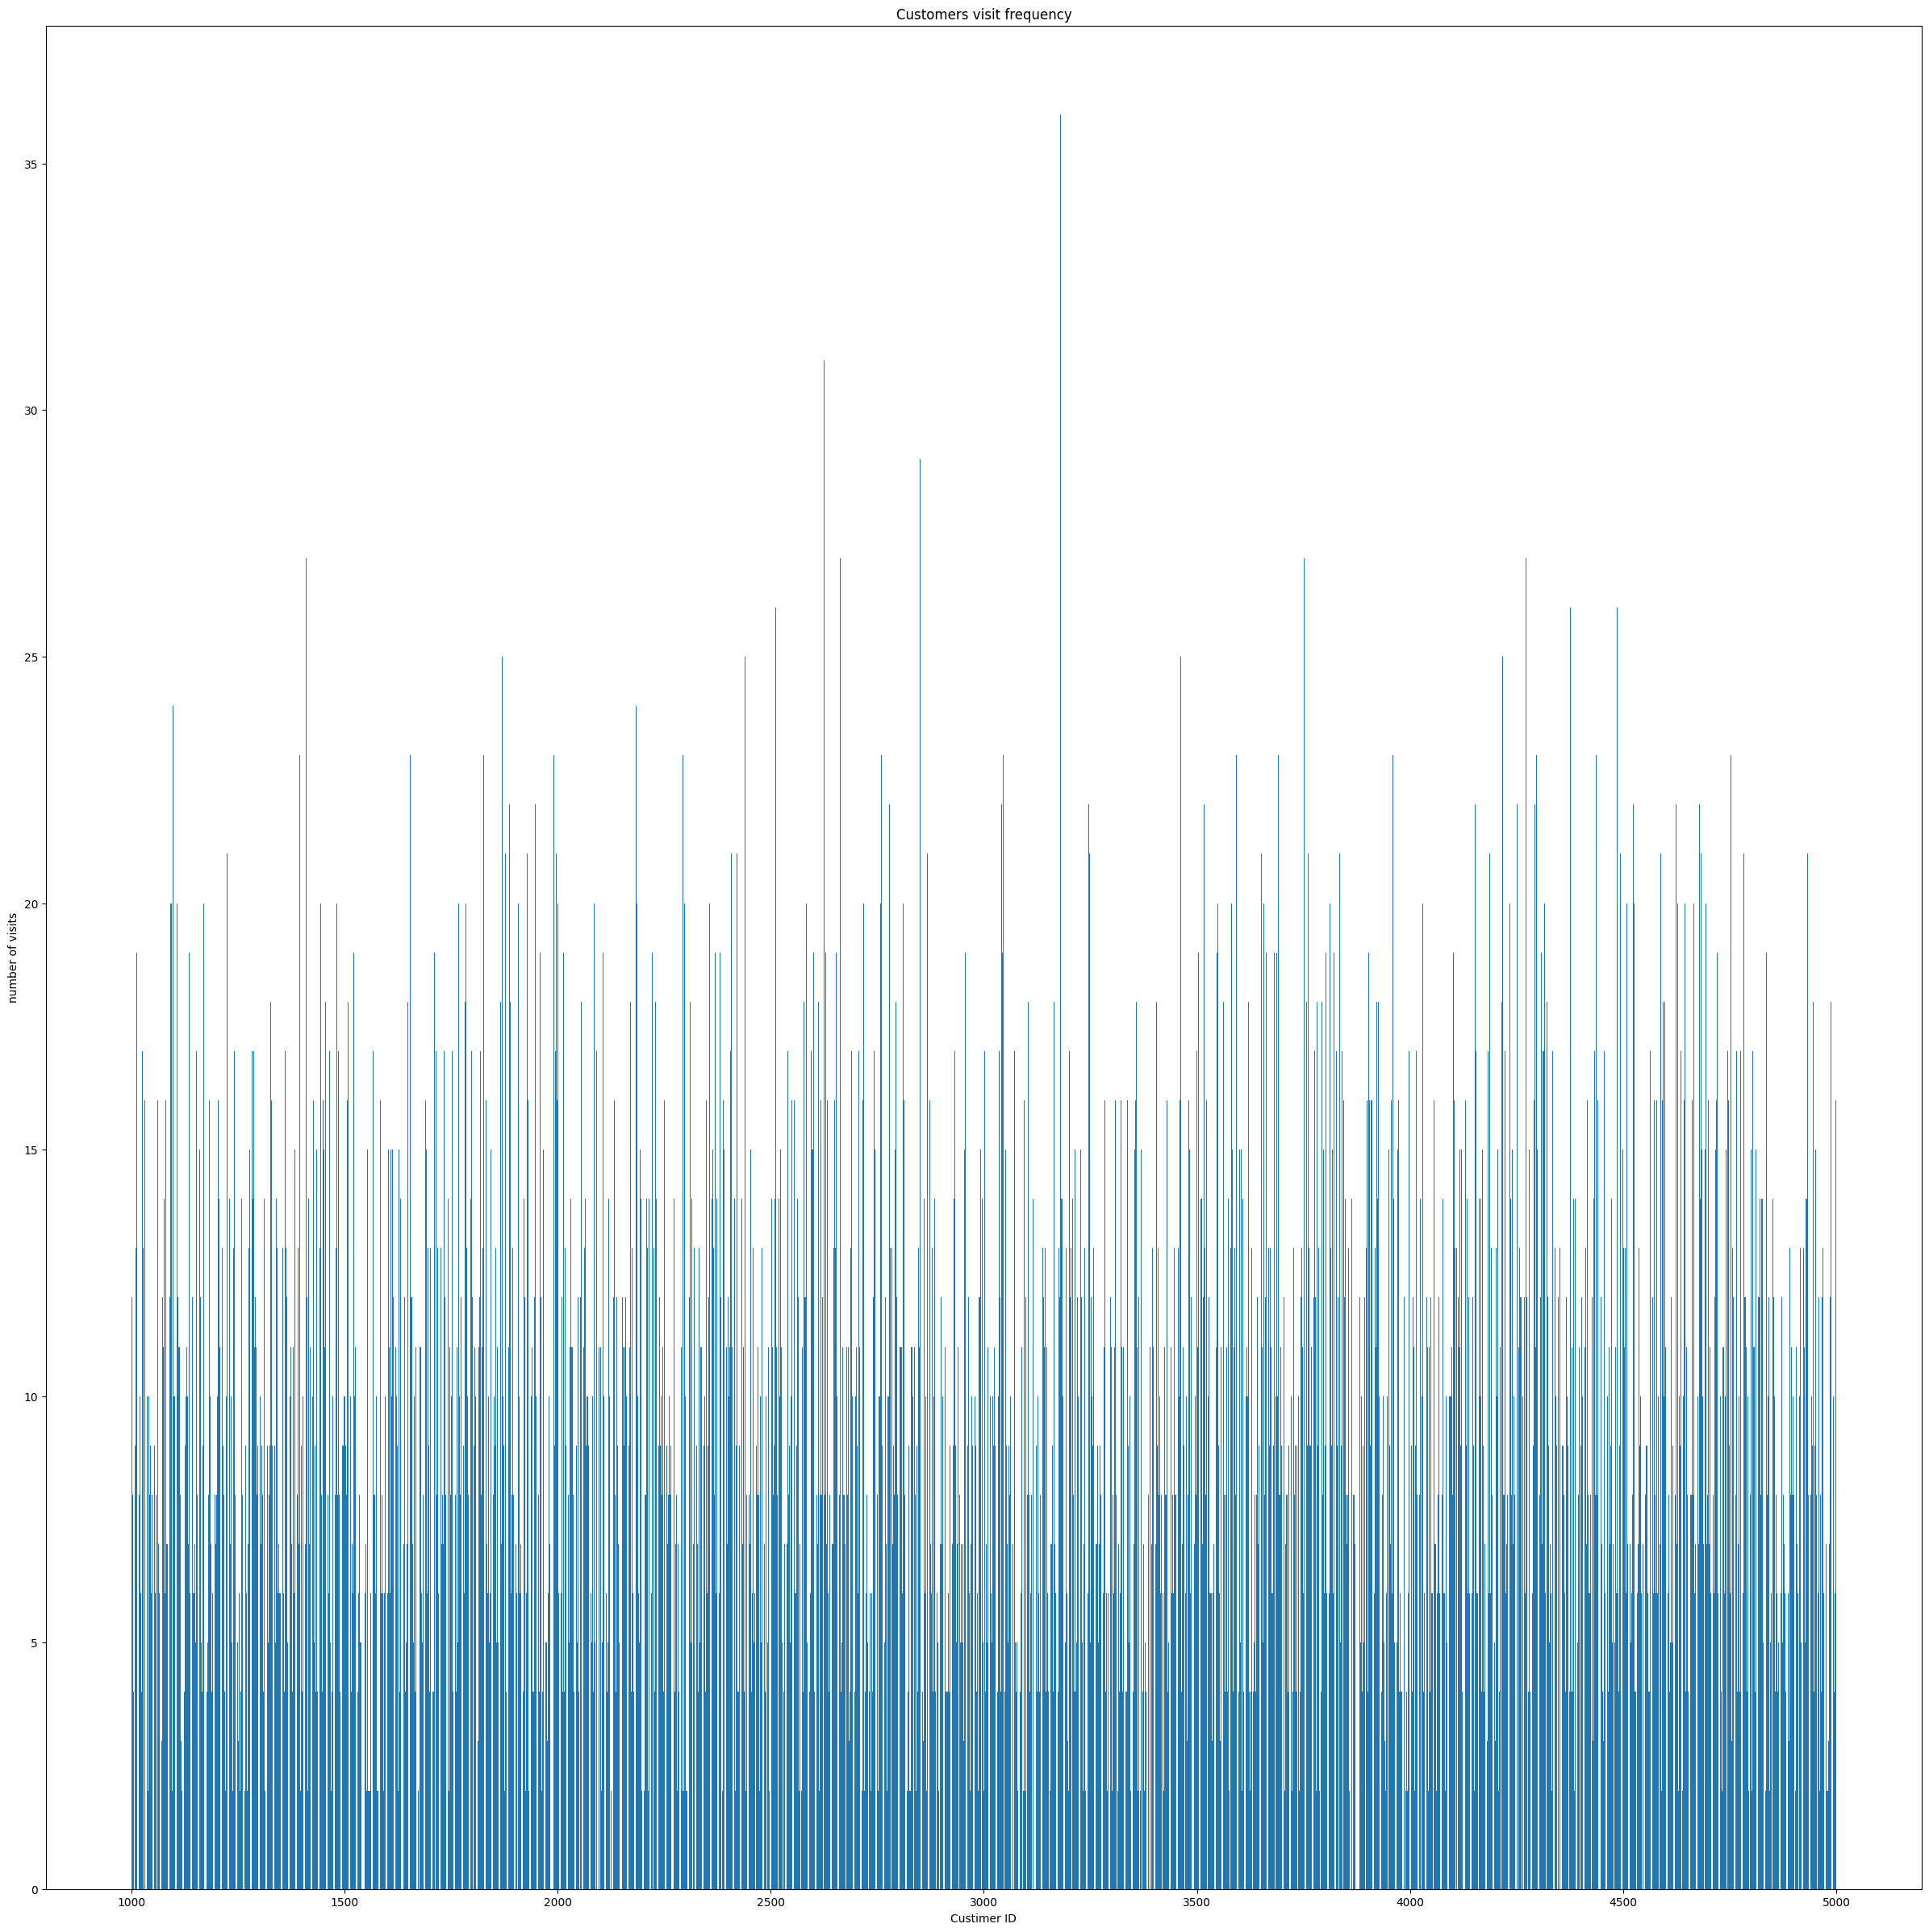

In [16]:
#visualizing the frequency of the customers coming to the market
plt.figure(figsize=(30,30))
plt.bar(cust_freq_df['Member_number'], cust_freq_df['freq'])
plt.title('Customers visit frequency')
plt.xlabel('Custimer ID')
plt.ylabel('number of visits')
plt.show()

<ipython-input-19-a6adfb07954f>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  day_freq['Date'] = pd.to_datetime(day_freq['Date'])


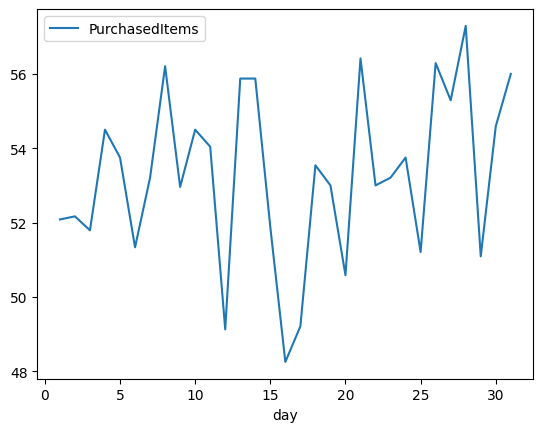

In [19]:



# Adding a new column for purchased items
freq_df2 = df.groupby(['Date']).count()
freq_df2 = freq_df2.rename(columns={'itemDescription': 'PurchasedItems'})
freq_df2 = freq_df2.drop('Member_number', axis=1)
freq_df2 = freq_df2.reset_index()
day_freq = freq_df2
freq_df2
# Splitting the date column
day_freq['Date'] = pd.to_datetime(day_freq['Date'])
day_freq['day'] = day_freq['Date'].dt.day
day_freq['month'] = day_freq['Date'].dt.month
day_freq['year'] = day_freq['Date'].dt.year
day_freq
# Dropping extra columns
day_freq = day_freq.drop(['Date', 'month', 'year'], axis=1)
day_freq
# Counting transaction per day number
day_freq = day_freq.groupby(['day']).mean()
day_freq
# Reseting the dataframe for plotting

day_freq = day_freq.reset_index()
day_freq
# Plotting the dataframe in a line chart

day_freq.plot(x="day", y="PurchasedItems", kind="line")
plt.show()

In [37]:
#input some data from the user
min_sup=int(input("please enter the min sup:  "))
while min_sup<1:
    min_sup=int(input("wrong input please enter correct min sup:  "))
min_conf=int(input("please enter the min conf %:  "))
while min_conf<1:
    min_conf=int(input("wrong input please enter correct min conf %:  ")) 
length=int(input("please enter the length:  "))
while length<1:
    length=int(input("wrong input please enter correct length:  "))

please enter the min sup:  10
please enter the min conf %:  2
please enter the length:  3


In [21]:
#supportive function to check the frequency of subset in TDB
def subset_frequency(df, s):
    count = 0
    for row in df.itertuples(index=False):
        #print(row[0])
        if s.issubset(row[0]):
            count += 1
    return count 

In [22]:
current_length=1
freq_subset = pd.DataFrame({'itemset': [], 'sup': []})
#create the initial itemset df
for item in freq_df.itertuples(index=False):
    element=set([item[0]])
    #print(element)
    freq=subset_frequency(TDB_df,element)
    #print (freq)
    if freq>=min_sup:
        freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
freq_subset
        

<ipython-input-22-6c37887525cb>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
<ipython-input-22-6c37887525cb>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
<ipython-input-22-6c37887525cb>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
<ipython-input-22-6c37887525cb>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': fr

,itemset,sup
0,{Instant food products},60.0
1,{UHT-milk},320.0
2,{abrasive cleaner},22.0
3,{artif. sweetener},29.0
4,{baking powder},121.0
...,...,...
149,{white bread},359.0
150,{white wine},175.0
151,{whole milk},2363.0
152,{yogurt},1285.0


In [23]:

while True:
    old_freq_subset=freq_subset.copy()
    old_freq_subset.head()
    freq_subset=pd.DataFrame({'itemset': [], 'sup': []})
    # Get all possible pairs of sets in the column
    pairs = list(itertools.product(old_freq_subset['itemset'], repeat=2))
    # Filter out the pairs where both sets are the same
    pairs = [pair for pair in pairs if pair[0] != pair[1]]
    # Convert the tuples to sets
    sets = [(set1, set2) for set1, set2 in pairs]
    # Create a list of dictionaries representing the combinations
    combinations= [ set1 | set2 for set1, set2 in sets]
    #combinations=list(set(combinations))
    # Convert sets to frozensets
    frozen_combinations = [frozenset(c) for c in combinations]
    # Remove duplicates
    unique_combinations = list(set(frozen_combinations))
    # Convert frozensets back to sets
    combinations = [set(c) for c in unique_combinations]
    for element in combinations:
        freq=subset_frequency(TDB_df,element)
        #print (freq)
        if freq>=min_sup:
            freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
    current_length=current_length+1
    if current_length>length or len(freq_subset)==0:
        break

<ipython-input-23-da8675b1329f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
<ipython-input-23-da8675b1329f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
<ipython-input-23-da8675b1329f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': freq}, ignore_index=True)
<ipython-input-23-da8675b1329f>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_subset=freq_subset.append({'itemset': element, 'sup': fr

In [24]:
old_freq_subset

,itemset,sup
0,"{rolls/buns, sausage, soda}",10.0
1,"{whole milk, rolls/buns, other vegetables}",18.0
2,"{pastry, whole milk, rolls/buns}",11.0
3,"{bottled beer, whole milk, rolls/buns}",10.0
4,"{whole milk, other vegetables, root vegetables}",10.0
5,"{whole milk, rolls/buns, sausage}",17.0
6,"{other vegetables, rolls/buns, soda}",17.0
7,"{frankfurter, whole milk, other vegetables}",12.0
8,"{whole milk, sausage, soda}",16.0
9,"{tropical fruit, whole milk, soda}",10.0


In [38]:
# get all possible subsets from the frequent itemset
def get_subsets(itemsets):
    subsets = []
    # iterate through the frequent itemsets
    for itemset in itemsets:
        items = frozenset(itemset)
        # Get the generated combinations' set
        generate_combinations(items, subsets)
    return subsets

# Generate possible combinations from extracted subsets
def generate_combinations(items, subsets):
    # Sort alphabetically
    items = sorted(items)
    for i in range(1, len(items)):
        subset = []
        # Generate combinations
        generating_helper(items, i, 0, subset, subsets)

# Support generating the combinations        
def generating_helper(items, r, start, subset, subsets):
    # Return all combinations till the end of the set
    if len(subset) == r:
        subsets.append(list(subset))
        return
    for i in range(start, len(items)):
        # Join the combinations
        subset.append(items[i])
        generating_helper(items, r, i + 1, subset, subsets)
        # Remove the last combination to avoid redundancy
        subset.pop()

        
# Copy the frequent patterns set
ar_df = old_freq_subset.copy()

# Extracte unique itemsets
itemsets = ar_df['itemset'].apply(lambda x: frozenset(x)).values

# Generate the association rules
extracted_ars = get_subsets(itemsets)

# Process the association rules
for rule in extracted_ars:
    # Join elements of every subset as antecedents
    antecedent = ','.join(rule) 
    # Calculate the frequency of the antecedent in the transaction set
    antecedent_freq = subset_frequency(TDB_df, set(antecedent.split(",")))
    # Join the elements other than antecedent as consequents
    consequent = ','.join(set(ar_df['itemset'].values[0]) - set(rule))
    # Calculate the frequency of the consequent in the transaction set
    consequent_freq = subset_frequency(TDB_df, set(consequent.split(",")))
    # Calculate the frequency of the union of antecedent and consequent in the transaction set
    AC_freq = subset_frequency(TDB_df,  set(antecedent.split(",")).union(set(consequent.split(","))))
    # Calculate the confidence of the rule base on the transaction set
    new_conf = AC_freq/antecedent_freq
    # Calculate the probabilities for lift parameters
    ant_prob = antecedent_freq/TOTAL_TRANSACTIONS
    con_prob = consequent_freq/TOTAL_TRANSACTIONS
    AC_prob = AC_freq/TOTAL_TRANSACTIONS
    # Calculate the lift of the rule
    lift = AC_prob/(con_prob*ant_prob)
    # Extract the most interesting association rules
    if new_conf >= min_conf/100 and lift >= 1:
      print(f"Rule: {antecedent} -> {consequent}")
      print("lift: ",lift,"conf: ",new_conf*100 )
 
    



Rule: rolls/buns,sausage -> soda
lift:  1.2872505161734344 conf:  12.5
Rule: rolls/buns,soda -> sausage
lift:  1.3694480290674793 conf:  8.264462809917356
Rule: sausage,soda -> rolls/buns
lift:  1.0214070200827339 conf:  11.235955056179774
Rule: other vegetables,rolls/buns -> sausage,soda
lift:  4.256293557104253 conf:  2.5316455696202533
Rule: rolls/buns,sausage -> soda
lift:  1.2872505161734344 conf:  12.5
Rule: sausage,whole milk -> rolls/buns,soda
lift:  2.768533366226717 conf:  2.2388059701492535
Rule: other vegetables,rolls/buns -> sausage,soda
lift:  4.256293557104253 conf:  2.5316455696202533
Rule: other vegetables,soda -> rolls/buns,sausage
lift:  5.159655172413793 conf:  2.7586206896551726
Rule: rolls/buns,soda -> sausage
lift:  1.3694480290674793 conf:  8.264462809917356
Rule: sausage,soda -> rolls/buns
lift:  1.0214070200827339 conf:  11.235955056179774
Rule: sausage,whole milk -> rolls/buns,soda
lift:  2.768533366226717 conf:  2.2388059701492535
Rule: soda,yogurt -> rolls/